# Data Analyses

This notebook presents a step-by-step evaluation of the data collected by AWSBench. It centralizes our results and makes it easy to adapt our analyses and graphs. Our objective is to evaluate the performance variation, focusing on four main questions:

- Q1. Considering the same VM types, is the performance consistent across different regions?  
- Q2. How does the evolution of VM generations impact performance? Is there a considerable gain in terms of performance and price with new generations compared to older ones?  
- Q3. Is the performance of the Spot market consistent with that observed in the on-demand market?  
- Q4. Is there significant performance variability throughout the day? Is this variability statistically significant?

# Initial (Interesting) Observations

## Intel Machines

1. The performance of Intel machines has more variability.
2. Looking at the generation evolution of Intel machines, we can see that there is no significant performance variation.

When looking at the price of Intel machines, we see that over generations, there is an increment in on-demand prices, especially in the c7i machine. However, the performance gains do not justify the adoption of this machine. For instance, we see an increment of around 5% in the price between c5 (Intel) with a reduction of only 4% in the execution time.

## Graviton Machines

1. The Graviton machines show no outliers, indicating that these machines have almost no performance variation during the period we conducted the tests.
2. Compared to other machines, the on-demand Graviton machines are less expensive.
3. The c7g machine has the best cost/performance ratio.

In addition to the third observation, we see that for the new generations of the Graviton machines, there is also an increment in the price. However, unlike the Intel machines, the reduction in time justifies the adoption. For instance, from the instance c6g to the instance c7g, there was an increment of 5.65% in the price and a reduction of 33.41% in the time.



## AMD Machines

1. Between generations (c5a and c6a), AMD machines do not have a significant difference in price and performance.
2. Curiously, the c5a machine has a slightly better execution time than the c6a (3%).

AMD machines are less expensive than Intel machines and show better execution times.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df_sa = pd.read_csv("data_test01/results_sa-east-1.csv")
df_us = pd.read_csv("data_test01/results_us-east-1.csv")

# clean up the data to consider only the SUCCESS status and on-demand instances
df_sa_success = df_sa[(df_sa['Status'] == 'SUCCESS') & (df_sa['Market'] == 'ondemand')]
df_us_success = df_us[(df_us['Status'] == 'SUCCESS') & (df_us['Market'] == 'ondemand')]

df_sa_success = df_sa_success.sort_values(by='Instance')


In [96]:
# percentual difference in the Cost of c7i and c6i
def percentual_difference(instance01, instance02, df, column):
    cost_instance01 = df[df['Instance'] == instance01][column].mean()
    cost_instance02 = df[df['Instance'] == instance02][column].mean()

    print(f"{column} {instance01}: {cost_instance01 : .2f}")
    print(f"{column} {instance02}: {cost_instance02 : .2f}")
    # Using absolute value to ensure the percentual difference is always positive
    percentual_diff = abs((cost_instance01 - cost_instance02) / cost_instance02) * 100
    print(f"Percentual difference {instance01} and {instance02}: {percentual_diff : .2f}%")
    print(f"{10 * '-'}")

    
percentual_difference('c5.12xlarge', 'c7i.12xlarge', df_sa_success, 'Price')
percentual_difference('c7i.12xlarge', 'c5.12xlarge', df_us_success, 'Time_in_Seconds')

percentual_difference('c6g.12xlarge', 'c7g.12xlarge', df_sa_success, 'Price')
percentual_difference('c7g.12xlarge', 'c6g.12xlarge',  df_us_success, 'Time_in_Seconds')

percentual_difference('c5a.12xlarge', 'c6a.12xlarge', df_sa_success, 'Price')
percentual_difference('c5a.12xlarge', 'c6a.12xlarge', df_us_success, 'Time_in_Seconds')


Price c5.12xlarge:  3.14
Price c7i.12xlarge:  3.30
Percentual difference c5.12xlarge and c7i.12xlarge:  4.76%
----------
Time_in_Seconds c7i.12xlarge:  57.66
Time_in_Seconds c5.12xlarge:  59.90
Percentual difference c7i.12xlarge and c5.12xlarge:  3.73%
----------
Price c6g.12xlarge:  2.52
Price c7g.12xlarge:  2.67
Percentual difference c6g.12xlarge and c7g.12xlarge:  5.65%
----------
Time_in_Seconds c7g.12xlarge:  44.82
Time_in_Seconds c6g.12xlarge:  67.31
Percentual difference c7g.12xlarge and c6g.12xlarge:  33.41%
----------
Price c5a.12xlarge:  2.83
Price c6a.12xlarge:  2.83
Percentual difference c5a.12xlarge and c6a.12xlarge:  0.08%
----------
Time_in_Seconds c5a.12xlarge:  59.02
Time_in_Seconds c6a.12xlarge:  61.26
Percentual difference c5a.12xlarge and c6a.12xlarge:  3.65%
----------


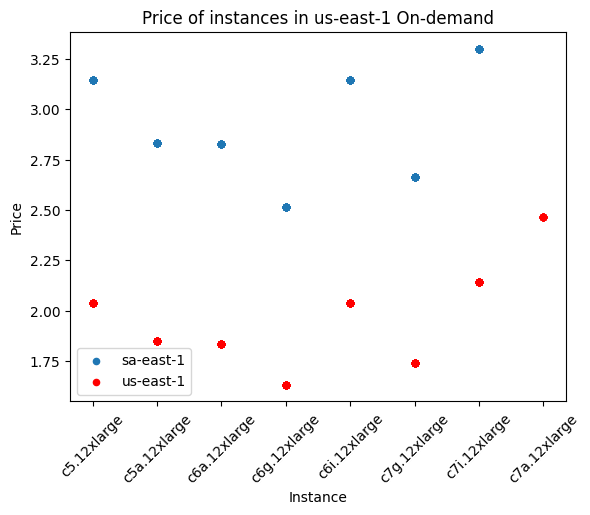

In [102]:
# plot scatter plot with the price of the instances
scatter = df_sa_success.plot.scatter(x='Instance', y='Price', title='Price of instances in sa-east-1 On-demand')
# add the price of the instances in us-east-1
df_us_success.plot.scatter(ax=scatter, x='Instance', y='Price', color='red', title='Price of instances in us-east-1 On-demand')

# add legend
plt.legend(['sa-east-1', 'us-east-1'])

plt.xticks(rotation=45)


plt.show()



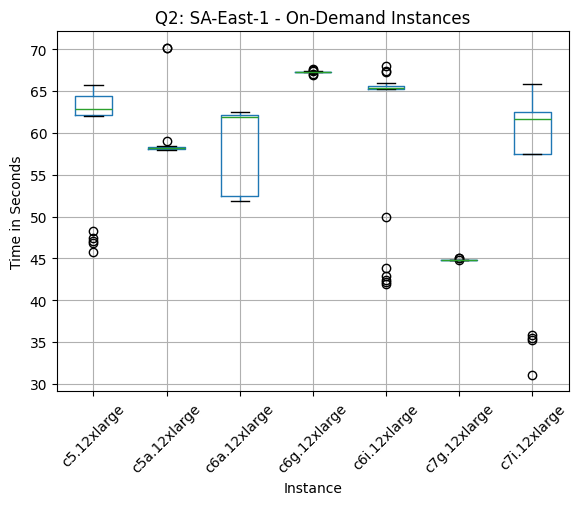

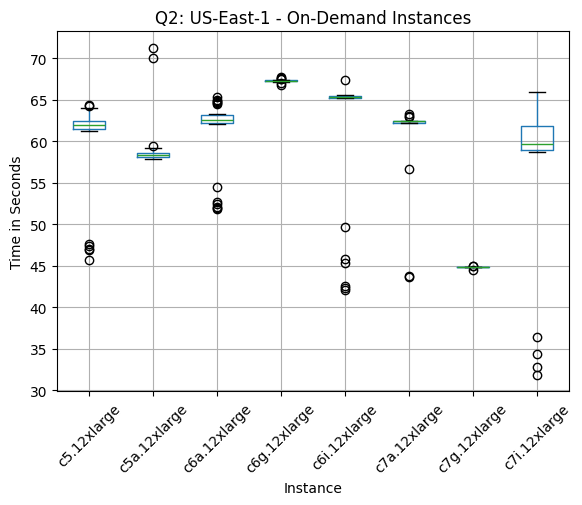

In [109]:
import matplotlib.pyplot as plt

def plot_boxplot(df, title):
    # order the instances by the average time
    df = df.sort_values(by='Instance')

    # Create the boxplot
    boxplot = df.boxplot(column='Time_in_Seconds', by='Instance')

    # Set the title
    plt.title(title) 

    # Remove the automatic 'by' title
    plt.suptitle('')

    # Set the y-axis label to 90 degrees
    plt.ylabel('Time in Seconds')

    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


plot_boxplot(df_sa_success, 'Q2: SA-East-1 - On-Demand Instances')
plot_boxplot(df_us_success, 'Q2: US-East-1 - On-Demand Instances')

2024-06-18 12:57:50.988787


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
15,2024-06-18 12:57:50.988787,2024-06-18 13:03:19.674607,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.29,24.0,24.0,2357.71,98.24,SUCCESS
14,2024-06-18 12:57:50.988787,2024-06-18 13:02:19.081372,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.17,24.0,24.0,2362.59,98.44,SUCCESS
12,2024-06-18 12:57:50.988787,2024-06-18 13:00:17.856493,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.03,24.0,24.0,2368.28,98.68,SUCCESS
13,2024-06-18 12:57:50.988787,2024-06-18 13:01:18.572558,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.38,24.0,24.0,2354.36,98.10,SUCCESS
11,2024-06-18 12:57:50.988787,2024-06-18 12:59:17.521025,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.42,24.0,24.0,2352.57,98.02,SUCCESS


2024-06-18 18:33:32.836415


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
50,2024-06-18 18:33:32.836415,2024-06-18 18:38:01.012928,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.01,24.0,24.0,2369.41,98.73,SUCCESS
51,2024-06-18 18:33:32.836415,2024-06-18 18:39:13.279405,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,70.16,24.0,24.0,1958.91,81.62,SUCCESS
48,2024-06-18 18:33:32.836415,2024-06-18 18:36:00.601485,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.05,24.0,24.0,2367.74,98.66,SUCCESS
47,2024-06-18 18:33:32.836415,2024-06-18 18:35:00.289557,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.48,24.0,24.0,2350.37,97.93,SUCCESS
49,2024-06-18 18:33:32.836415,2024-06-18 18:37:00.831441,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.09,24.0,24.0,2366.12,98.59,SUCCESS


2024-06-18 20:32:16.191097


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
99,2024-06-18 20:32:16.191097,2024-06-18 20:37:56.905383,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,70.17,24.0,24.0,1958.74,81.61,SUCCESS
97,2024-06-18 20:32:16.191097,2024-06-18 20:35:44.260972,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.09,24.0,24.0,2365.86,98.58,SUCCESS
96,2024-06-18 20:32:16.191097,2024-06-18 20:34:44.020168,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.10,24.0,24.0,2365.42,98.56,SUCCESS
95,2024-06-18 20:32:16.191097,2024-06-18 20:33:43.515962,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,59.06,24.0,24.0,2326.93,96.96,SUCCESS
98,2024-06-18 20:32:16.191097,2024-06-18 20:36:44.567887,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.14,24.0,24.0,2364.11,98.50,SUCCESS


2024-06-19 00:05:17.539965


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
146,2024-06-19 00:05:17.539965,2024-06-19 00:09:45.819621,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.25,24.0,24.0,2359.62,98.32,SUCCESS
144,2024-06-19 00:05:17.539965,2024-06-19 00:07:44.951626,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.11,24.0,24.0,2365.01,98.54,SUCCESS
147,2024-06-19 00:05:17.539965,2024-06-19 00:10:46.113509,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.12,24.0,24.0,2364.67,98.53,SUCCESS
145,2024-06-19 00:05:17.539965,2024-06-19 00:08:45.430952,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.29,24.0,24.0,2358.04,98.25,SUCCESS
143,2024-06-19 00:05:17.539965,2024-06-19 00:06:44.674843,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.13,24.0,24.0,2364.36,98.51,SUCCESS


2024-06-19 04:22:49.482874


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
211,2024-06-19 04:22:49.482874,2024-06-19 04:24:17.943455,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.28,24.0,24.0,2358.13,98.26,SUCCESS
214,2024-06-19 04:22:49.482874,2024-06-19 04:27:18.948236,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.28,24.0,24.0,2358.07,98.25,SUCCESS
213,2024-06-19 04:22:49.482874,2024-06-19 04:26:18.493868,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.19,24.0,24.0,2361.93,98.41,SUCCESS
215,2024-06-19 04:22:49.482874,2024-06-19 04:28:19.600775,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.48,24.0,24.0,2350.04,97.92,SUCCESS
212,2024-06-19 04:22:49.482874,2024-06-19 04:25:18.144712,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.10,24.0,24.0,2365.63,98.57,SUCCESS


2024-06-19 08:32:05.315976


,Start_Time,End_Time,Instance,InstanceID,Price,Market,Region,Zone,Algorithm_Name,Class,Time_in_Seconds,Total_Threads,Available_Threads,Mops_Total,Mops_per_Thread,Status
276,2024-06-19 08:32:05.315976,2024-06-19 08:34:33.629882,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.28,24.0,24.0,2358.34,98.26,SUCCESS
279,2024-06-19 08:32:05.315976,2024-06-19 08:37:34.512014,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.27,24.0,24.0,2358.74,98.28,SUCCESS
277,2024-06-19 08:32:05.315976,2024-06-19 08:35:33.908021,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.00,24.0,24.0,2369.58,98.73,SUCCESS
278,2024-06-19 08:32:05.315976,2024-06-19 08:36:34.088339,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,57.96,24.0,24.0,2371.46,98.81,SUCCESS
275,2024-06-19 08:32:05.315976,2024-06-19 08:33:33.048758,c5a.12xlarge,NaN,2.832,ondemand,sa-east-1,b,NAS Benchmark,D,58.28,24.0,24.0,2358.07,98.25,SUCCESS


In [ ]:
df_us_success